In [60]:
import pandas as pd
import numpy as np
from numpy import reshape
from sklearn import cluster # importa o pacote cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import math 
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving sample_stocks.csv to sample_stocks.csv


In [4]:
arquivo = pd.read_csv("sample_stocks.csv")

**Visualize suas informações**

In [5]:
print(arquivo.columns)

Index(['returns', 'dividendyield'], dtype='object')


In [6]:
arquivo.dtypes

returns            int64
dividendyield    float64
dtype: object

**Plote a dispersão de returns vs. dividendyield**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


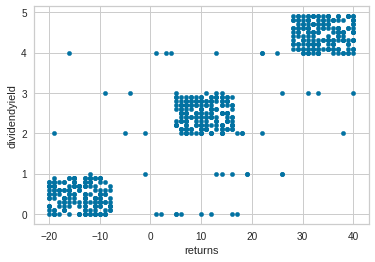

In [7]:
arquivo.plot.scatter("returns", "dividendyield")

**Normalize os dados**

In [67]:
arquivo = pd.get_dummies(arquivo)
arquivo

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0
...,...,...
643,4,4.0
644,13,4.0
645,1,4.0
646,22,4.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


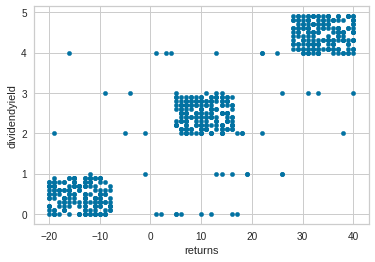

In [9]:
arquivo.plot.scatter("returns", "dividendyield")

In [70]:
arquivo2 = arquivo
arquivo3 = arquivo
scaler = StandardScaler()
scaler.fit(arquivo2)
arquivo2 = scaler.transform(arquivo2)
arquivo2

array([[-1.5024685 , -1.48095143],
       [-1.19537158, -1.48095143],
       [-1.2465544 , -1.48095143],
       ...,
       [-0.47881211,  0.95225478],
       [ 0.59602709,  0.95225478],
       [-1.34892004,  0.95225478]])

**Crie e treine o KMeans com um valor de k que achar válido**

In [11]:
kmeans = cluster.KMeans(n_clusters = 3) #cria o modelo
clusters = kmeans.fit(arquivo2) #encontra clusters
clusters.inertia_ #Soma do quadrado das distâncias das
                  #amostras para o centro do seu cluster

77.62109287678899

**Plote a dispersão juntamente com os kmeans.cluster_centers_**

In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(arquivo2)
kmeans.labels_
#isso aqui tambem tem que plotar eu so nao sei como tb

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
preds = kmeans.predict([[0, 0], [12, 3]]) 


In [35]:
y_means = kmeans.predict(arquivo2)


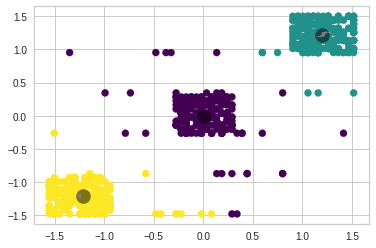

In [41]:
plt.scatter(arquivo2[:, 0], arquivo2[:, 1], c=y_means, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#kmeans.cluster_centers_

**Analise o valor de K utilizando o método Elbow baseado na inércia**

colocar o parametro kmeans dentro do KMeans ta certo?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f40212f4090>,
                 k=None, metric=None, model=None, timings=True)

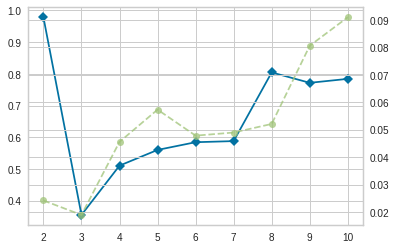

In [15]:
model = KElbowVisualizer(KMeans(kmeans), k=10)
model.fit(arquivo2)
model

Parte II
**Implemente Clustering Hierárquico**

**Visualize o dendograma** 

Extra: Implemente pelo menos mais uma forma de clustering a seu critério e compare as três formas de visualização 

In [ ]:
scaler = StandardScaler()
scaler.fit(arquivo3)
arquivo3 = scaler.transform(arquivo3)
arquivo3

In [85]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(arquivo3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
cluster.children_

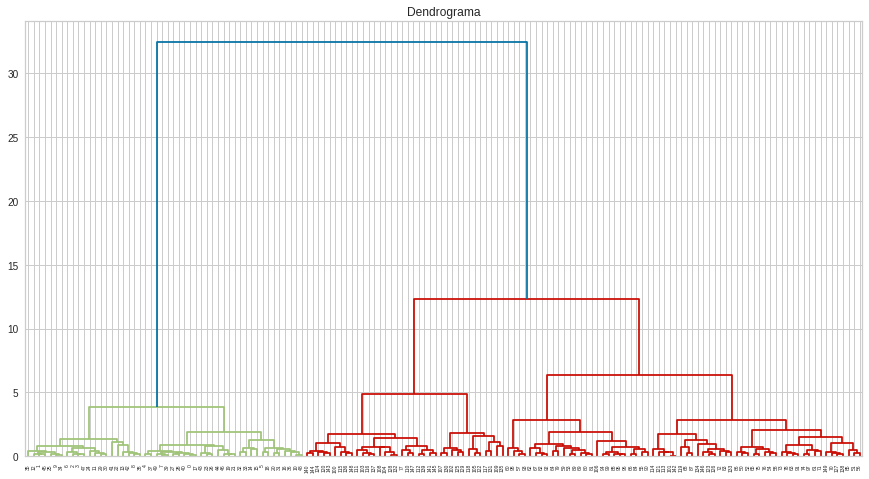

In [102]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 8))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(arquivo3, method='ward'))